In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import gc
gc.collect()

0

# Analisis de Muestra - Taxis

## Carga de datos

In [4]:
taxis = pd.read_parquet('taxis_def.parquet')

In [5]:
taxis = taxis.sample(frac=0.5, random_state=42)

In [6]:
taxis

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,type,trip_type,pickup_datetime,dropoff_datetime,duration
21759953,1,0.90,1.0,N,162,237,2,10.00,2.5,0.5,...,0.0,1.0,17.00,2.5,0.0,yellow,1.0,2024-03-27 14:57:31,2024-03-27 15:11:34,14.050000
17921464,1,5.78,1.0,N,151,234,2,26.80,2.5,0.5,...,0.0,1.0,39.96,2.5,0.0,yellow,1.0,2024-02-20 16:39:50,2024-02-20 16:58:53,19.050000
10106282,1,1.52,1.0,N,90,224,2,13.50,0.0,0.5,...,0.0,1.0,21.00,2.5,0.0,yellow,1.0,2023-12-04 15:35:40,2023-12-04 15:49:27,13.783333
33115331,1,1.54,1.0,N,148,249,1,14.38,0.0,0.5,...,0.0,1.0,20.38,2.5,0.0,yellow,1.0,2024-06-08 01:57:35,2024-06-08 02:03:59,6.400000
28493094,1,2.21,1.0,N,236,170,2,14.90,1.0,0.5,...,0.0,1.0,20.90,2.5,0.0,yellow,1.0,2024-05-21 22:12:35,2024-05-21 22:25:32,12.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934583,1,1.89,1.0,N,234,161,5,14.20,0.0,0.5,...,0.0,1.0,18.20,2.5,0.0,yellow,1.0,2024-06-01 15:06:40,2024-06-01 15:20:03,13.383333
6185995,1,0.45,1.0,N,237,237,2,5.80,2.5,0.5,...,0.0,1.0,14.76,2.5,0.0,yellow,1.0,2023-10-31 18:02:34,2023-10-31 18:06:31,3.950000
4747098,1,1.37,1.0,N,163,237,2,10.00,1.0,0.5,...,0.0,1.0,18.00,2.5,0.0,yellow,1.0,2023-10-18 20:46:46,2023-10-18 20:54:36,7.833333
38355318,3,3.83,1.0,N,43,148,2,21.20,1.0,0.5,...,0.0,1.0,31.44,2.5,0.0,yellow,1.0,2024-08-22 00:09:31,2024-08-22 00:29:02,19.516667


In [7]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16798962 entries, 21759953 to 2950308
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   passenger_count        int64         
 1   trip_distance          float64       
 2   RatecodeID             float64       
 3   store_and_fwd_flag     object        
 4   PULocationID           int32         
 5   DOLocationID           int32         
 6   payment_type           int64         
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  Airport_fee            float64       
 16  type                   object        
 17  trip_type              float64       
 18  pickup_datetime    

## Manejo de nulos y vacios

In [8]:
taxis.isnull().sum().sum()

np.int64(0)

In [9]:
taxis.isnull().sum()

passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
type                     0
trip_type                0
pickup_datetime          0
dropoff_datetime         0
duration                 0
dtype: int64

In [10]:
taxis[taxis.duplicated()]

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,type,trip_type,pickup_datetime,dropoff_datetime,duration
34677347,3,3.59,1.0,N,148,230,3,20.5,1.0,0.5,...,0.0,1.0,25.5,2.5,0.0,yellow,1.0,2024-07-15 23:06:25,2024-07-15 23:26:26,20.016667
24714742,3,1.42,1.0,N,113,170,3,15.6,0.0,0.5,...,0.0,1.0,19.6,2.5,0.0,yellow,1.0,2024-04-20 18:34:32,2024-04-20 18:51:38,17.100000
30572775,1,1.30,1.0,N,237,161,3,10.0,0.0,0.5,...,0.0,1.0,14.0,2.5,0.0,yellow,1.0,2024-06-07 12:17:49,2024-06-07 12:26:22,8.550000
4314970,1,1.97,1.0,N,249,13,5,13.5,0.0,0.5,...,0.0,1.0,17.5,2.5,0.0,yellow,1.0,2023-10-14 19:47:46,2023-10-14 19:59:11,11.416667
13458034,1,0.83,1.0,N,148,232,3,8.6,0.0,0.5,...,0.0,1.0,12.6,2.5,0.0,yellow,1.0,2024-01-05 15:31:12,2024-01-05 15:39:21,8.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39108215,2,2.30,1.0,N,163,238,3,14.9,2.5,0.5,...,0.0,1.0,21.4,2.5,0.0,yellow,1.0,2024-08-30 18:12:43,2024-08-30 18:25:28,12.750000
23795170,2,0.41,1.0,N,164,170,5,5.1,0.0,0.5,...,0.0,1.0,9.1,2.5,0.0,yellow,1.0,2024-04-12 06:57:46,2024-04-12 07:01:03,3.283333
26924036,2,2.00,1.0,N,142,162,5,13.5,1.0,0.5,...,0.0,1.0,18.5,2.5,0.0,yellow,1.0,2024-05-07 22:37:32,2024-05-07 22:49:55,12.383333
39048212,1,0.92,1.0,N,237,162,3,5.8,1.0,0.5,...,0.0,1.0,10.8,2.5,0.0,yellow,1.0,2024-08-30 00:22:32,2024-08-30 00:25:11,2.650000


## Analisis de Variables

### Variables tipo *'datetime'*

In [11]:
import locale
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252') 

'Spanish_Spain.1252'

In [12]:
df_time = taxis[['pickup_datetime','dropoff_datetime']]

In [13]:
df_time[~(df_time['dropoff_datetime'].dt.year == df_time['pickup_datetime'].dt.year)]

,pickup_datetime,dropoff_datetime
12903347,2023-12-31 23:51:01,2024-01-01 00:18:14
12904446,2023-12-31 23:35:00,2024-01-01 00:00:45
12902845,2023-12-31 23:45:37,2024-01-01 00:17:18
12902573,2023-12-31 23:55:11,2024-01-01 00:12:15
12903588,2023-12-31 23:44:04,2024-01-01 00:03:36
...,...,...
12904020,2023-12-31 23:41:17,2024-01-01 00:04:10
12903660,2023-12-31 23:38:52,2024-01-01 00:00:11
12904684,2023-12-31 23:54:18,2024-01-01 00:04:12
12904758,2023-12-31 23:40:02,2024-01-01 00:01:54


In [14]:
df_time['pickup_year'] = df_time['pickup_datetime'].dt.year

In [15]:
df_time['dropoff_year'] = df_time['dropoff_datetime'].dt.year

In [16]:
df_time['month'] = df_time['pickup_datetime'].dt.strftime('%B').str.upper()

In [17]:
df_time['weekday'] = df_time['pickup_datetime'].dt.strftime('%A').str.upper()

In [18]:
df_time['duration'] = df_time['dropoff_datetime'] - df_time['pickup_datetime']
df_time['duration'] = df_time['duration'].dt.total_seconds() / 60

In [19]:
df_time['hour'] = df_time['pickup_datetime'].dt.hour

In [20]:
df_time

,pickup_datetime,dropoff_datetime,pickup_year,dropoff_year,month,weekday,duration,hour
21759953,2024-03-27 14:57:31,2024-03-27 15:11:34,2024,2024,MARZO,MIÉRCOLES,14.050000,14
17921464,2024-02-20 16:39:50,2024-02-20 16:58:53,2024,2024,FEBRERO,MARTES,19.050000,16
10106282,2023-12-04 15:35:40,2023-12-04 15:49:27,2023,2023,DICIEMBRE,LUNES,13.783333,15
33115331,2024-06-08 01:57:35,2024-06-08 02:03:59,2024,2024,JUNIO,SÁBADO,6.400000,1
28493094,2024-05-21 22:12:35,2024-05-21 22:25:32,2024,2024,MAYO,MARTES,12.950000,22
...,...,...,...,...,...,...,...,...
29934583,2024-06-01 15:06:40,2024-06-01 15:20:03,2024,2024,JUNIO,SÁBADO,13.383333,15
6185995,2023-10-31 18:02:34,2023-10-31 18:06:31,2023,2023,OCTUBRE,MARTES,3.950000,18
4747098,2023-10-18 20:46:46,2023-10-18 20:54:36,2023,2023,OCTUBRE,MIÉRCOLES,7.833333,20
38355318,2024-08-22 00:09:31,2024-08-22 00:29:02,2024,2024,AGOSTO,JUEVES,19.516667,0


#### Año

In [21]:
df_time['pickup_year'].value_counts()

pickup_year
2024    11258032
2023     5540930
Name: count, dtype: int64

In [22]:
25+12+12+2

51

In [23]:
31+7+6+5+2+1

52

In [24]:
df_time['dropoff_year'].value_counts()

dropoff_year
2024    11258170
2023     5540792
Name: count, dtype: int64

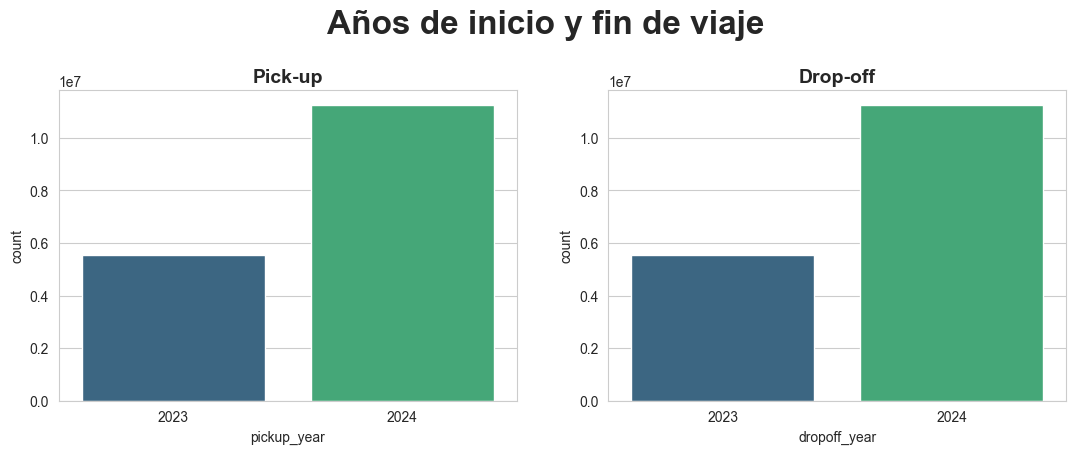

In [25]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2, figsize = (13,4.5))
fig.suptitle("Años de inicio y fin de viaje",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.8)

sns.barplot(data=df_time['pickup_year'].value_counts().to_frame(), x='pickup_year',y='count',palette='viridis', ax = ax[0])
ax[0].set_title('Pick-up',fontsize=14, fontweight='bold')

sns.barplot(data=df_time['dropoff_year'].value_counts().to_frame(), x='dropoff_year',y='count',palette='viridis', ax = ax[1])
ax[1].set_title('Drop-off',fontsize=14, fontweight='bold')

plt.show()

#### Mes

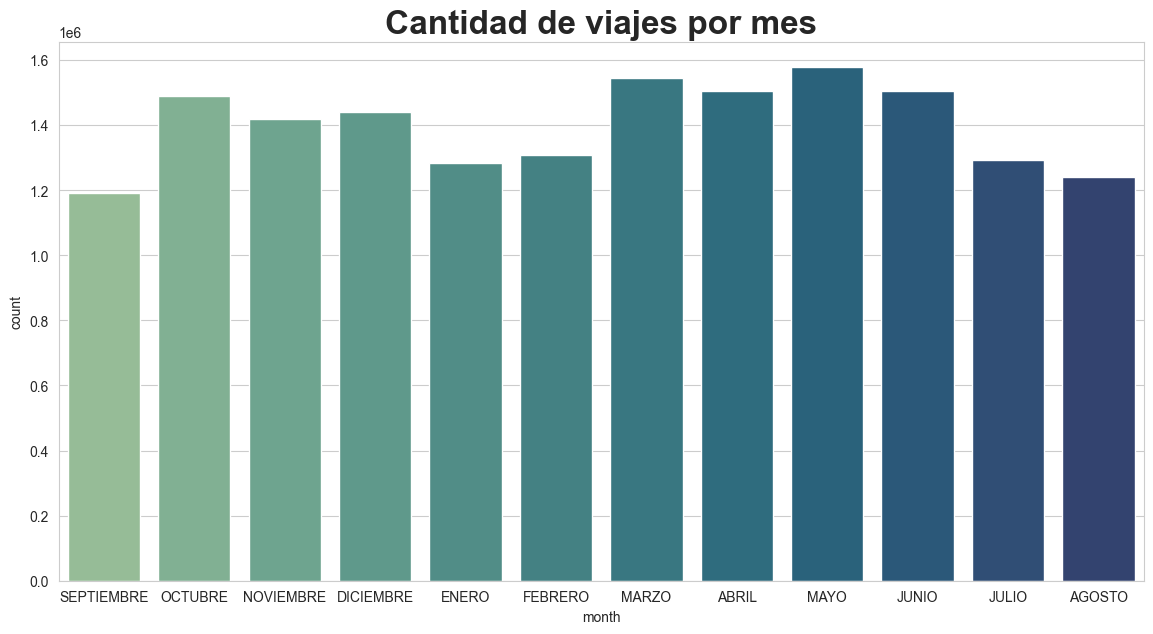

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.barplot(data=df_time.groupby('month').size().reset_index(name='count'), x='month', y='count', order=['SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE', 'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 
               'JULIO', 'AGOSTO'], palette='crest')
plt.title('Cantidad de viajes por mes', fontsize=24, fontweight='bold')
plt.show()

#### Dia de la semana

In [27]:
data=df_time['weekday'].value_counts().to_frame()
data

,count
weekday,
JUEVES,2641942
SÁBADO,2593121
MIÉRCOLES,2575367
VIERNES,2507135
MARTES,2426906
DOMINGO,2051515
LUNES,2002976


In [28]:
df_time['weekday'].value_counts().sort_values()

weekday
LUNES        2002976
DOMINGO      2051515
MARTES       2426906
VIERNES      2507135
MIÉRCOLES    2575367
SÁBADO       2593121
JUEVES       2641942
Name: count, dtype: int64

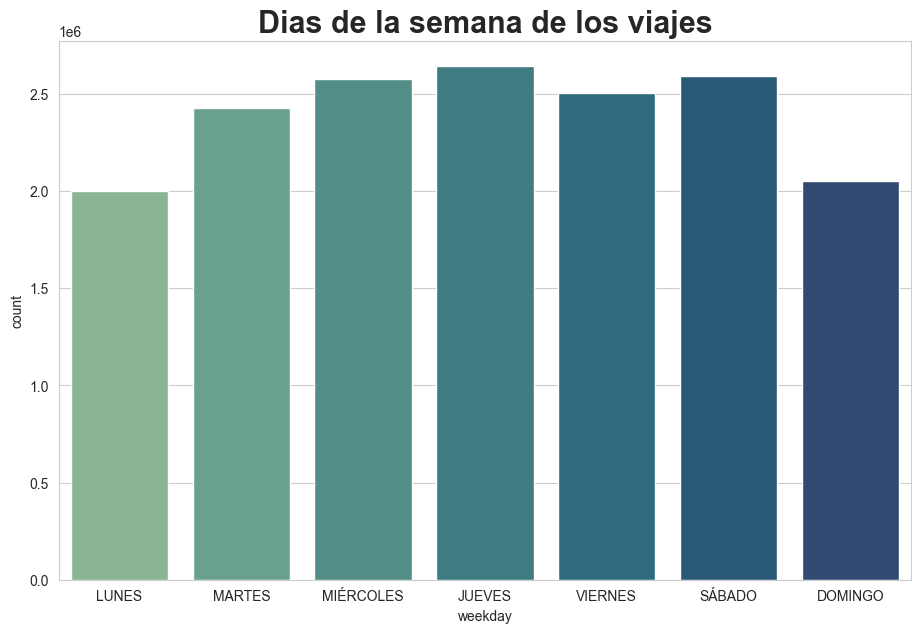

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(11,7))
sns.barplot(data=df_time['weekday'].value_counts().to_frame(), x='weekday',y='count', order=['LUNES', 'MARTES', 'MIÉRCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO'], palette='crest')
plt.title('Dias de la semana de los viajes', fontsize=22, fontweight='bold')
plt.show()

#### Hora

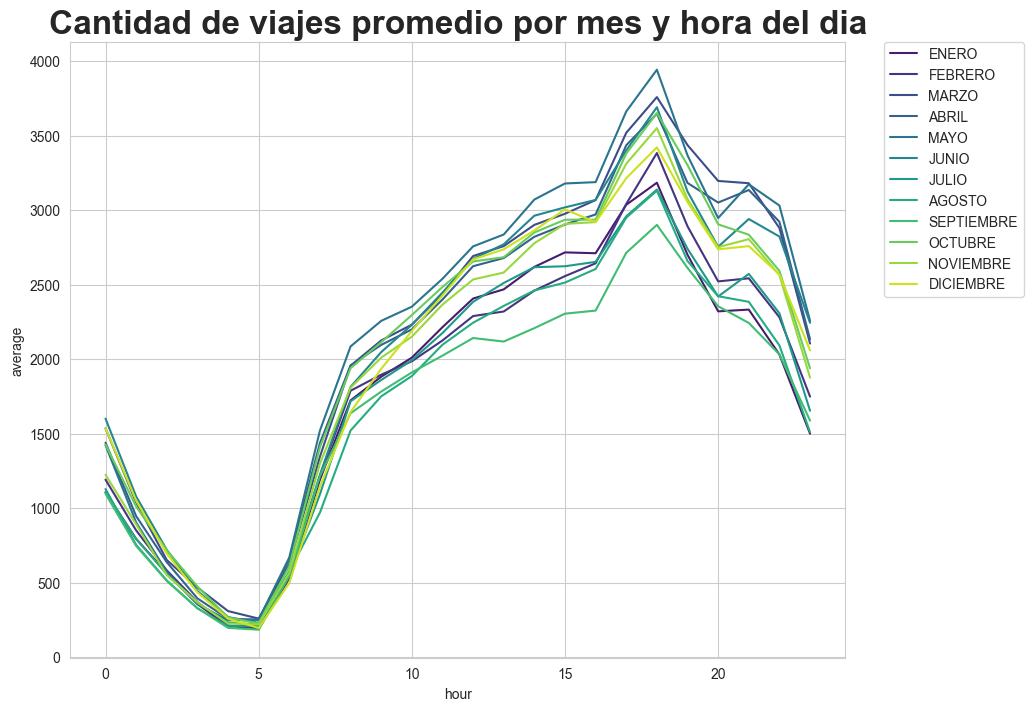

In [30]:
sns.set_style("whitegrid")
d = df_time.groupby(['month','hour']).size().reset_index(name='count')
d['average'] = d['count']/30
plt.figure(figsize=(10,8))
sns.lineplot(data=d, x="hour", y="average", hue="month",
              hue_order=['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'], palette='viridis')
plt.title('Cantidad de viajes promedio por mes y hora del dia', fontsize=24, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### Duracion

##### Distribucion

In [31]:
df_time['duration'].describe().apply(lambda x: '{:,.2f}'.format(x)).to_frame()

,duration
count,"16,798,962.00"
mean,12.76
std,7.46
min,0.00
25%,7.13
50%,11.28
75%,16.97
max,40.43


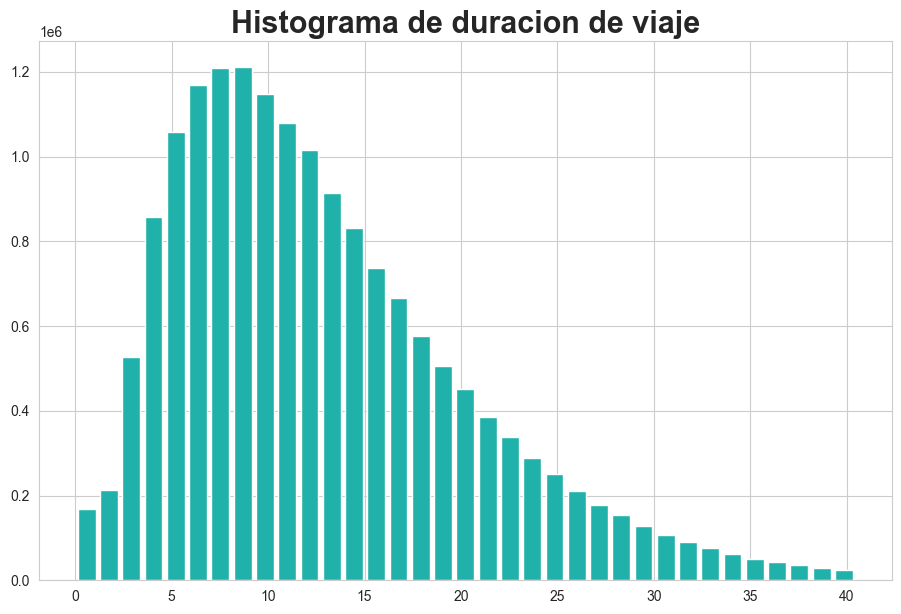

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(11,7))
plt.hist(df_time[(df_time['duration']>0)&(df_time['duration']<80)]['duration'], bins=35, rwidth=0.8, color='lightseagreen')
plt.title('Histograma de duracion de viaje', fontsize=22, fontweight='bold')
plt.show()

##### Outliers

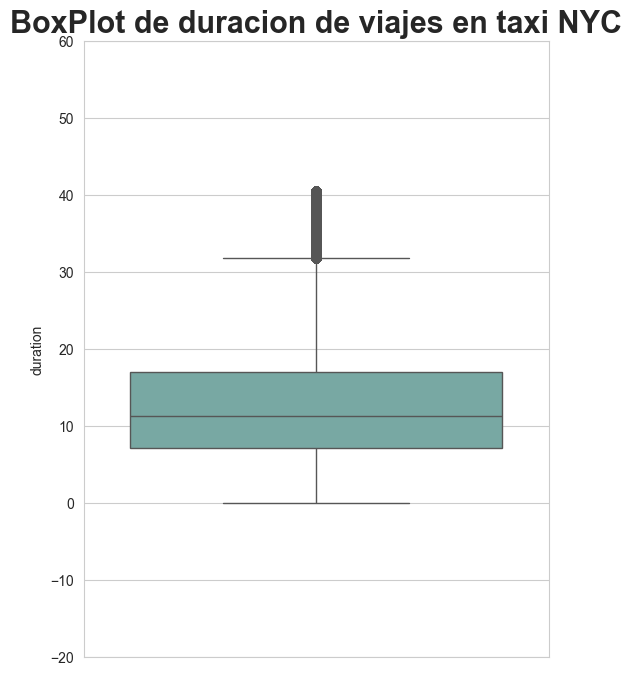

In [33]:
plt.figure(figsize=(6,8))
sns.boxplot(data=df_time, y='duration', saturation=0.3, color='turquoise')
plt.title('BoxPlot de duracion de viajes en taxi NYC', fontsize=22, fontweight='bold')
plt.ylim(-20, 60)

plt.show()

### Variables categoricas

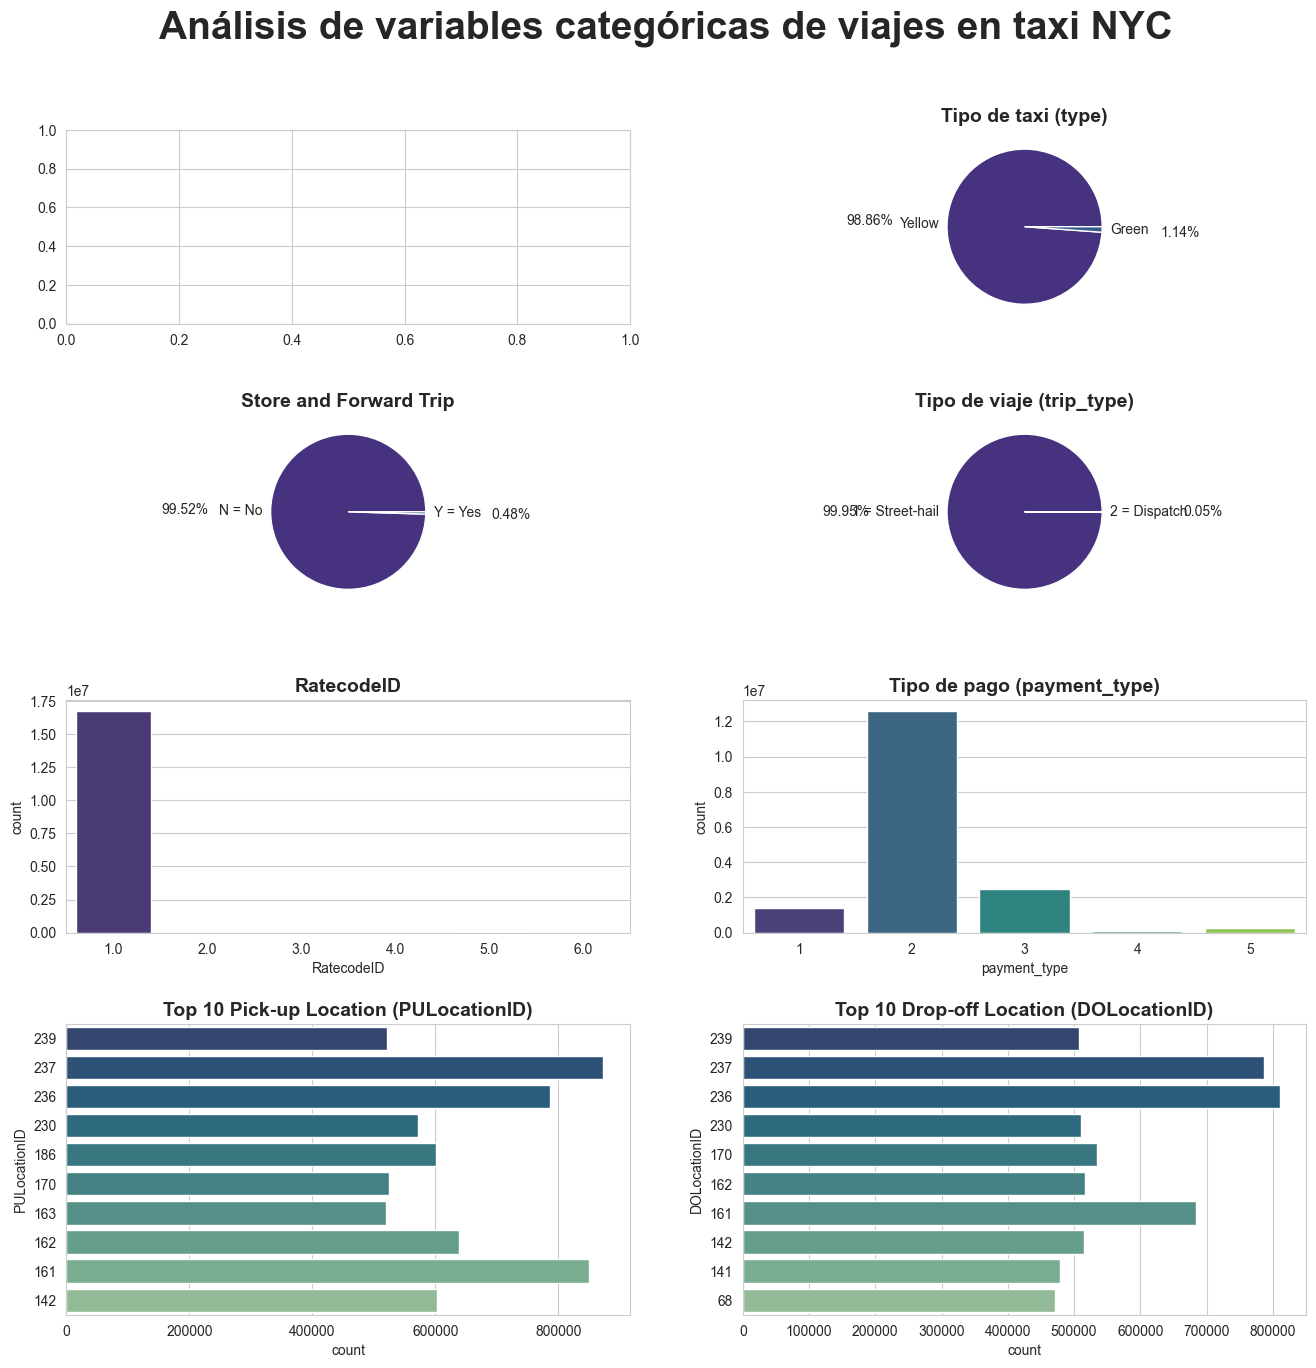

In [38]:
sns.set_palette("viridis")
sns.set_style("whitegrid")

fig, ax = plt.subplots(4,2, figsize = (16,15), gridspec_kw={'height_ratios': [1, 1, 1.2, 1.5]})
fig.suptitle("Análisis de variables categóricas de viajes en taxi NYC",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.4)

#ax[0,0].pie(taxis['VendorID'].value_counts(), labels=['2 = VeriFone Inc.', '1 = Creative Mobile Technologies, LLC', ''], autopct='%1.2f%%', pctdistance=1.4)
#ax[0,0].set_title('VendorID',fontsize=14, fontweight='bold')

ax[1,0].pie(taxis['store_and_fwd_flag'].value_counts(), labels=['N = No', 'Y = Yes'], autopct='%1.2f%%', pctdistance=2.1)
ax[1,0].set_title('Store and Forward Trip',fontsize=14, fontweight='bold')

ax[0,1].pie(taxis['type'].value_counts(), labels=['Yellow', 'Green'], autopct='%1.2f%%', pctdistance=2)
ax[0,1].set_title('Tipo de taxi (type)',fontsize=14, fontweight='bold')

ax[1,1].pie(taxis['trip_type'].value_counts(), labels=['1 = Street-hail', '2 = Dispatch'], autopct='%1.2f%%', pctdistance=2.3)
ax[1,1].set_title('Tipo de viaje (trip_type)',fontsize=14, fontweight='bold')

sns.barplot(data=taxis['RatecodeID'].value_counts().to_frame(), x='RatecodeID',y='count',palette='viridis', ax=ax[2,0])
ax[2,0].set_title('RatecodeID',fontsize=14, fontweight='bold')

sns.barplot(data=taxis['payment_type'].value_counts().to_frame(), x='payment_type',y='count', palette='viridis', ax=ax[2,1])
ax[2,1].set_title('Tipo de pago (payment_type)',fontsize=14, fontweight='bold')

sns.barplot(data=taxis['PULocationID'].value_counts().head(10).sort_values(ascending=False).to_frame(), x='count',y='PULocationID', palette='crest', orient='h', ax=ax[3,0])
ax[3,0].invert_yaxis()
ax[3,0].set_title('Top 10 Pick-up Location (PULocationID)',fontsize=14, fontweight='bold')

sns.barplot(data=taxis['DOLocationID'].value_counts().head(10).sort_values(ascending=False).to_frame(), x='count',y='DOLocationID', palette='crest', orient='h', ax=ax[3,1])
ax[3,1].invert_yaxis()
ax[3,1].set_title('Top 10 Drop-off Location (DOLocationID)',fontsize=14, fontweight='bold')

plt.show()

### Variables cuantitativas

In [42]:
var_cuanti = taxis[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee','passenger_count','trip_distance']]

In [43]:
var_cuanti.describe().iloc[1:,:]

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,passenger_count,trip_distance
mean,13.802854,1.253687,0.497970,2.480308,0.0,1.0,20.892443,2.393435,0.014787,1.290368,1.864021
std,6.754817,1.426902,0.031794,2.024044,0.0,0.0,7.843082,0.505031,0.160186,0.710084,1.306530
min,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.600000,0.000000,0.500000,0.000000,0.0,1.0,15.120000,2.500000,0.000000,1.000000,0.940000
50%,12.100000,1.000000,0.500000,2.520000,0.0,1.0,19.320000,2.500000,0.000000,1.000000,1.510000
75%,17.700000,2.500000,0.500000,3.780000,0.0,1.0,25.200000,2.500000,0.000000,1.000000,2.420000
max,42.550000,6.000000,0.500000,10.700000,0.0,1.0,52.820000,2.500000,1.750000,5.000000,6.760000


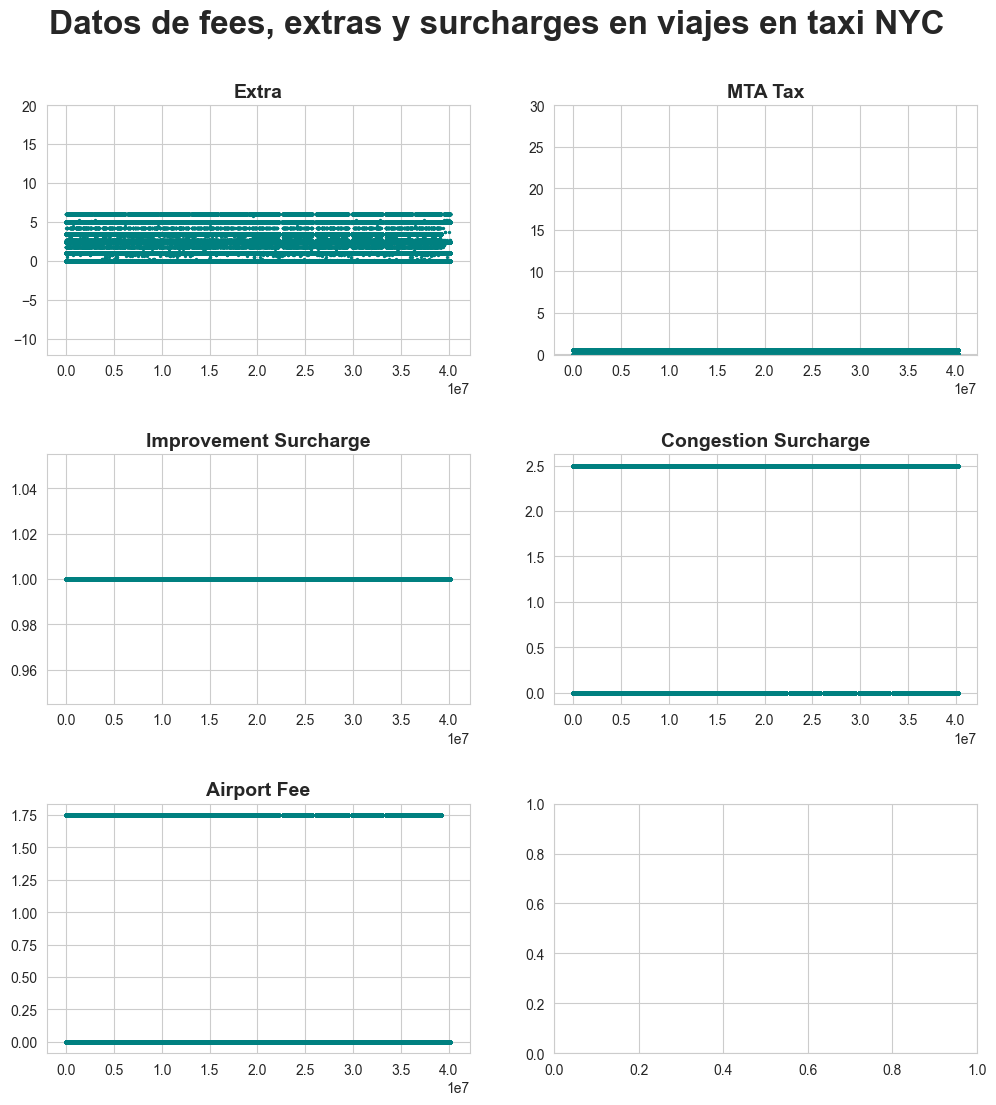

In [45]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,2, figsize = (12,12))
fig.suptitle("Datos de fees, extras y surcharges en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.4)

ax[0,0].plot(var_cuanti['extra'],'o',markersize=1.4,color='teal')
ax[0,0].set_ylim(-12,20)
ax[0,0].set_title('Extra',fontsize=14, fontweight='bold')

ax[0,1].plot(var_cuanti['mta_tax'],'o',markersize=1.4,color='teal')
ax[0,1].set_ylim(top=30)
ax[0,1].set_title('MTA Tax',fontsize=14, fontweight='bold')

ax[1,0].plot(var_cuanti['improvement_surcharge'],'o',markersize=1.4,color='teal')
ax[1,0].set_title('Improvement Surcharge',fontsize=14, fontweight='bold')

ax[1,1].plot(var_cuanti['congestion_surcharge'],'o',markersize=1.4,color='teal')
ax[1,1].set_title('Congestion Surcharge',fontsize=14, fontweight='bold')

ax[2,0].plot(var_cuanti['Airport_fee'],'o',markersize=1.4,color='teal')
ax[2,0].set_title('Airport Fee',fontsize=14, fontweight='bold')

plt.show()

#### Histogramas

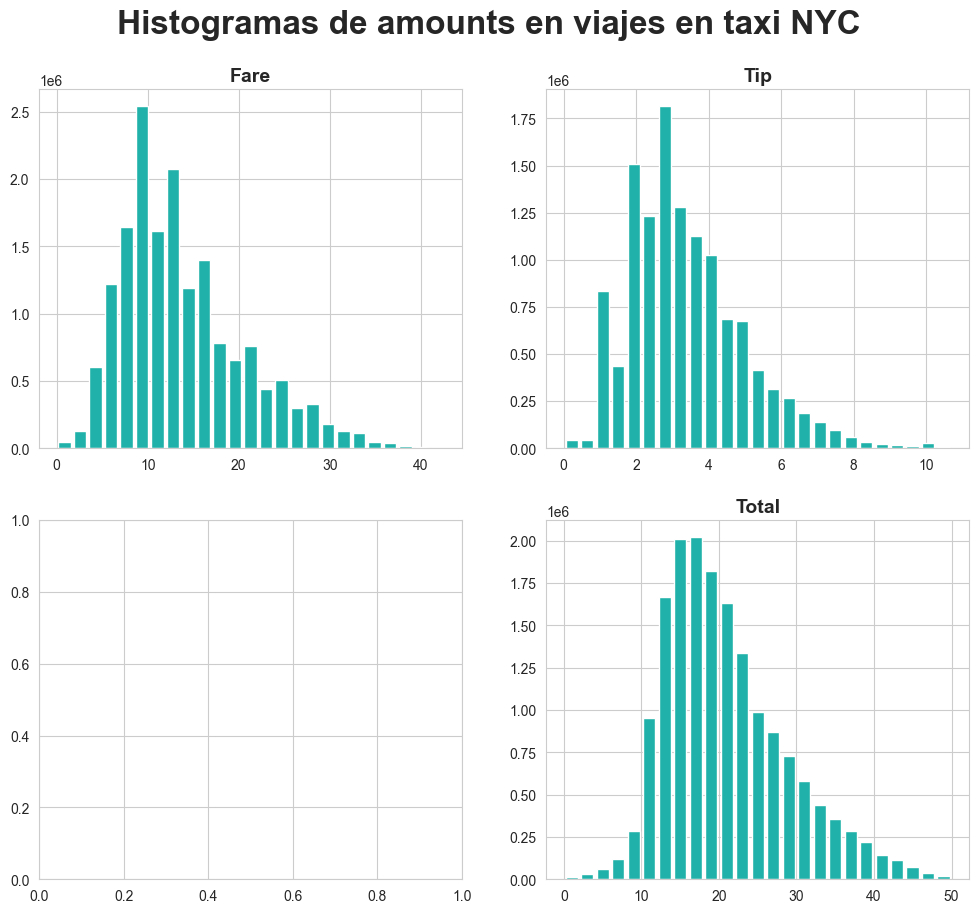

In [54]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2, figsize = (12,10), gridspec_kw={'height_ratios': [1, 1]})
fig.suptitle("Histogramas de amounts en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.2)

ax[0,0].hist(var_cuanti[(var_cuanti['fare_amount']>0)&(var_cuanti['fare_amount']<45)]['fare_amount'], bins=25, rwidth=0.8, color='lightseagreen')
ax[0,0].set_title('Fare',fontsize=14, fontweight='bold')

ax[0,1].hist(var_cuanti[(var_cuanti['tip_amount']>0)&(var_cuanti['tip_amount']<15)]['tip_amount'], bins=25, rwidth=0.8, color='lightseagreen')
ax[0,1].set_title('Tip',fontsize=14, fontweight='bold')

ax[1,1].hist(var_cuanti[(var_cuanti['total_amount']>0)&(var_cuanti['total_amount']<50)]['total_amount'], bins=25, rwidth=0.8, color='lightseagreen')
ax[1,1].set_title('Total',fontsize=14, fontweight='bold')

plt.show()

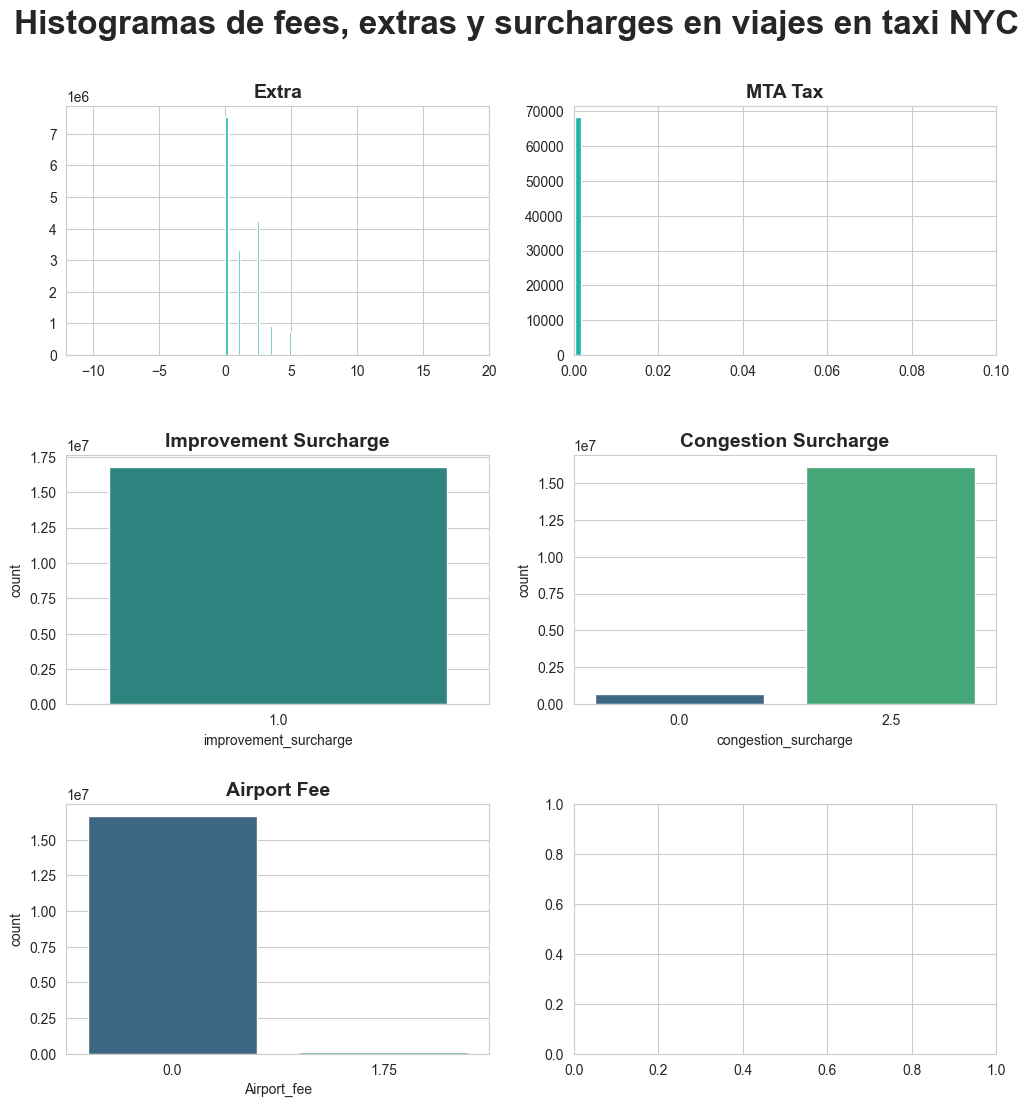

In [55]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,2, figsize = (12,12))
fig.suptitle("Histogramas de fees, extras y surcharges en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.4)

ax[0,0].hist(var_cuanti[(var_cuanti['extra']>-12)&(var_cuanti['extra']<20)]['extra'], bins=25, rwidth=0.8, color='lightseagreen')
ax[0,0].set_xlim(-12,20)
ax[0,0].set_title('Extra',fontsize=14, fontweight='bold')

ax[0,1].hist(var_cuanti[(var_cuanti['mta_tax']>-0.01)&(var_cuanti['mta_tax']<0.5)]['mta_tax'], bins=25, rwidth=0.8, color='lightseagreen')
ax[0,1].set_xlim(0,0.1)
ax[0,1].set_title('MTA Tax',fontsize=14, fontweight='bold')

sns.barplot(data=var_cuanti['improvement_surcharge'].value_counts().to_frame(), x='improvement_surcharge',y='count',palette='viridis', ax = ax[1,0])
ax[1,0].set_title('Improvement Surcharge',fontsize=14, fontweight='bold')

sns.barplot(data=var_cuanti['congestion_surcharge'].value_counts().to_frame(), x='congestion_surcharge',y='count',palette='viridis', ax = ax[1,1])
ax[1,1].set_title('Congestion Surcharge',fontsize=14, fontweight='bold')

sns.barplot(data=var_cuanti['Airport_fee'].value_counts().to_frame(), x='Airport_fee',y='count',palette='viridis', ax = ax[2,0])
ax[2,0].set_title('Airport Fee',fontsize=14, fontweight='bold')

plt.show()

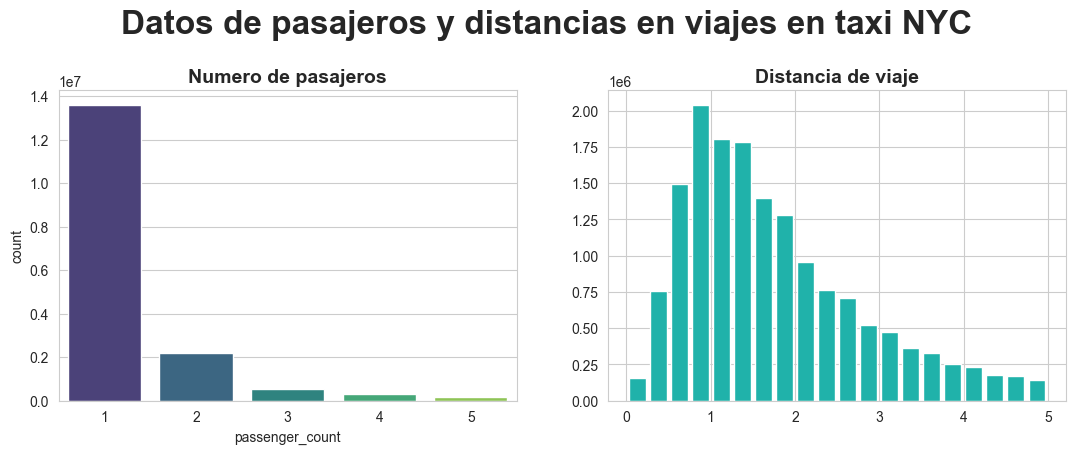

In [56]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2, figsize = (13,4.5))
fig.suptitle("Datos de pasajeros y distancias en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.8)

sns.barplot(data=var_cuanti['passenger_count'].value_counts().to_frame(), x='passenger_count',y='count',palette='viridis', ax = ax[0])
ax[0].set_title('Numero de pasajeros',fontsize=14, fontweight='bold')

ax[1].hist(var_cuanti[(var_cuanti['trip_distance']>0)&(var_cuanti['trip_distance']<5)]['trip_distance'], bins=20, rwidth=0.8, color='lightseagreen')
ax[1].set_title('Distancia de viaje',fontsize=14, fontweight='bold')

plt.show()

## Analisis de Outliers

In [57]:
var_cuanti['passenger_count'].value_counts()

passenger_count
1    13594932
2     2188054
3      530795
4      312484
5      172697
Name: count, dtype: int64

In [58]:
var_cuanti['improvement_surcharge'].value_counts()

improvement_surcharge
1.0    16798962
Name: count, dtype: int64

In [59]:
var_cuanti['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    16082891
0.0      716071
Name: count, dtype: int64

In [60]:
var_cuanti['Airport_fee'].value_counts()

Airport_fee
0.00    16657011
1.75      141951
Name: count, dtype: int64

### Boxplot

In [61]:
def outliers (col):
    '''
    Funcion que imprime los valores minimo, maximo, cantidad de outliers y su porcentaje en formato de tabla
        Parametros:
            col (str): Nombre de la columna
    '''
    Q3 = float(var_cuanti[col].quantile(0.75))
    Q1 = float(var_cuanti[col].quantile(0.25))
    RIC = Q3 - Q1

    Min = Q1 - 1.5*RIC
    Max = Q3 + 1.5*RIC

    out = var_cuanti[(var_cuanti[col]<Min)|(var_cuanti[col]>Max)]

    print(f'| {col} | {Min} | {Max} | {out.shape[0]} | {(out.shape[0]/taxis.shape[0])*100} % |')

In [62]:
for i in var_cuanti.columns:
    outliers(i)

| fare_amount | -5.049999999999999 | 31.349999999999998 | 294418 | 1.7525963806573286 % |
| extra | -3.75 | 6.25 | 0 | 0.0 % |
| mta_tax | 0.5 | 0.5 | 68206 | 0.40601318105249595 % |
| tip_amount | -5.67 | 9.45 | 40450 | 0.2407886868248169 % |
| tolls_amount | 0.0 | 0.0 | 0 | 0.0 % |
| improvement_surcharge | 1.0 | 1.0 | 0 | 0.0 % |
| total_amount | -1.7763568394002505e-15 | 40.32 | 362723 | 2.159198883835799 % |
| congestion_surcharge | 2.5 | 2.5 | 716071 | 4.262590748166464 % |
| Airport_fee | 0.0 | 0.0 | 141951 | 0.8449986374158117 % |
| passenger_count | 1.0 | 1.0 | 3204030 | 19.07278556853691 % |
| trip_distance | -1.2799999999999998 | 4.64 | 863626 | 5.140948589561665 % |


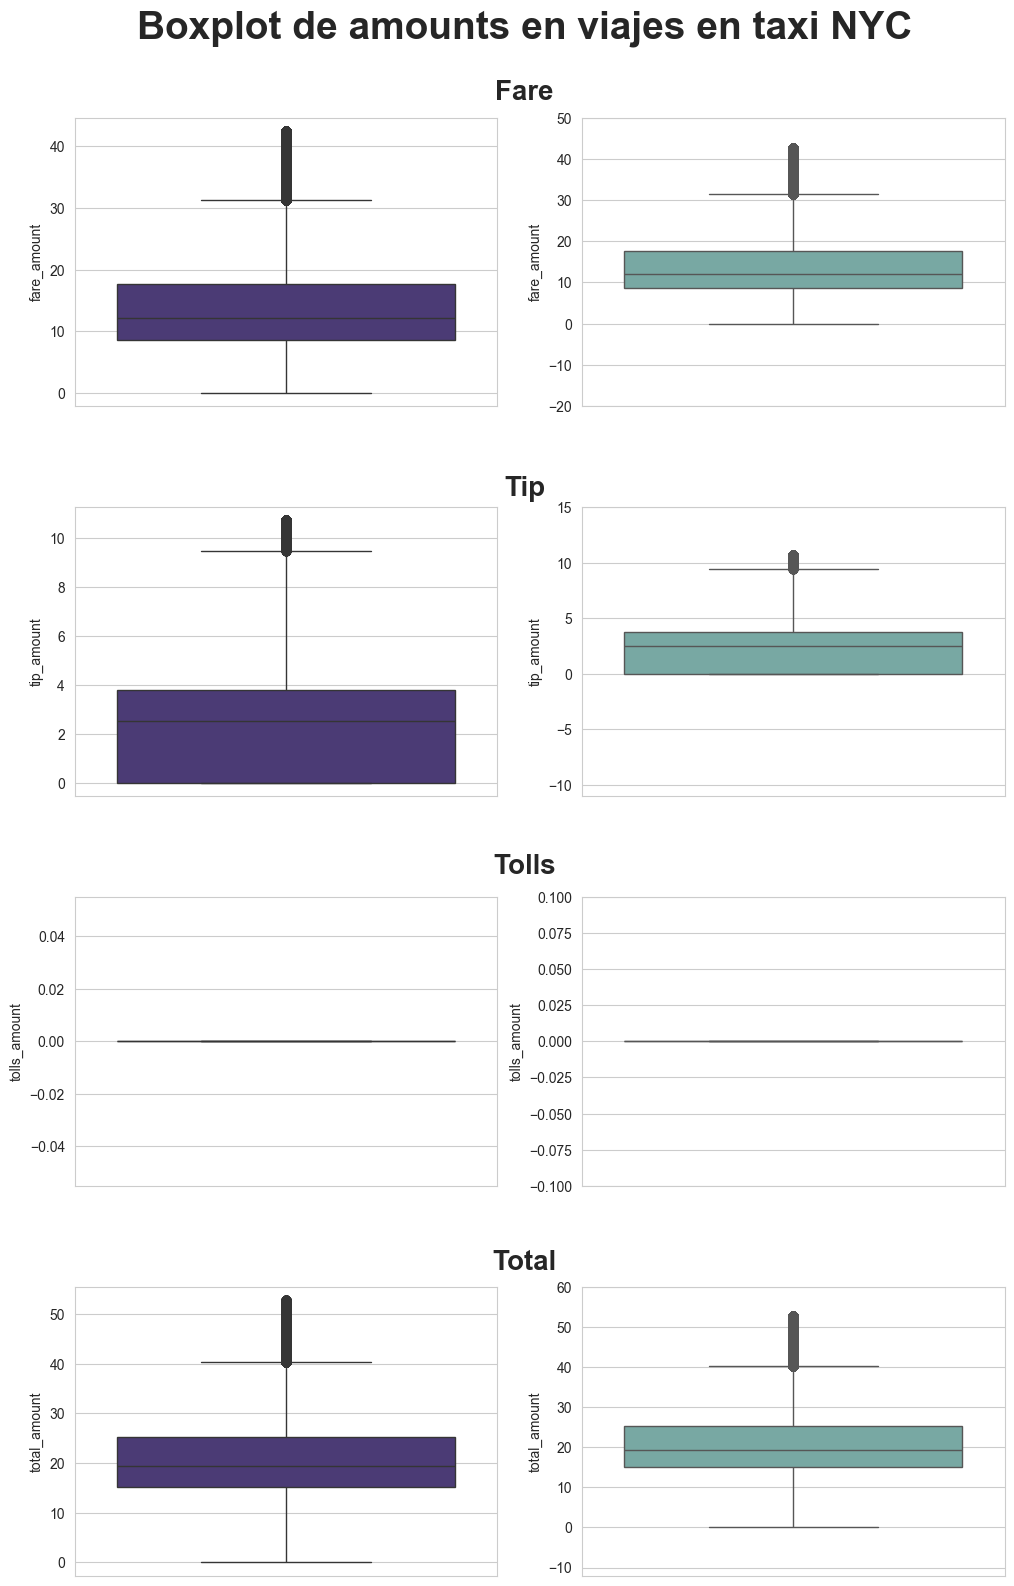

In [63]:
fig, ax = plt.subplots(4, 2, figsize=(12, 18))
fig.suptitle('Boxplot de amounts en viajes en taxi NYC', fontsize=28, fontweight='bold')
plt.subplots_adjust(top = 0.92, hspace=0.35)

fig.text(0.5, 0.93, 'Fare', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.71, 'Tip', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.50, 'Tolls', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.28, 'Total', ha='center', fontsize=20, fontweight='bold')


sns.boxplot(data=var_cuanti, y='fare_amount', ax = ax[0,0])
sns.boxplot(data=var_cuanti, y='fare_amount', saturation=0.3, color='turquoise', ax = ax[0,1])
ax[0,1].set_ylim(-20, 50)

sns.boxplot(data=var_cuanti, y='tip_amount', ax = ax[1,0])
sns.boxplot(data=var_cuanti, y='tip_amount', saturation=0.3, color='turquoise', ax = ax[1,1])
ax[1,1].set_ylim(-11, 15)

sns.boxplot(data=var_cuanti, y='tolls_amount', ax = ax[2,0])
sns.boxplot(data=var_cuanti, y='tolls_amount', saturation=0.3, color='turquoise', ax = ax[2,1])
ax[2,1].set_ylim(-0.1, 0.1)

sns.boxplot(data=var_cuanti, y='total_amount', ax = ax[3,0])
sns.boxplot(data=var_cuanti, y='total_amount', saturation=0.3, color='turquoise', ax = ax[3,1])
ax[3,1].set_ylim(-12, 60)

plt.show()

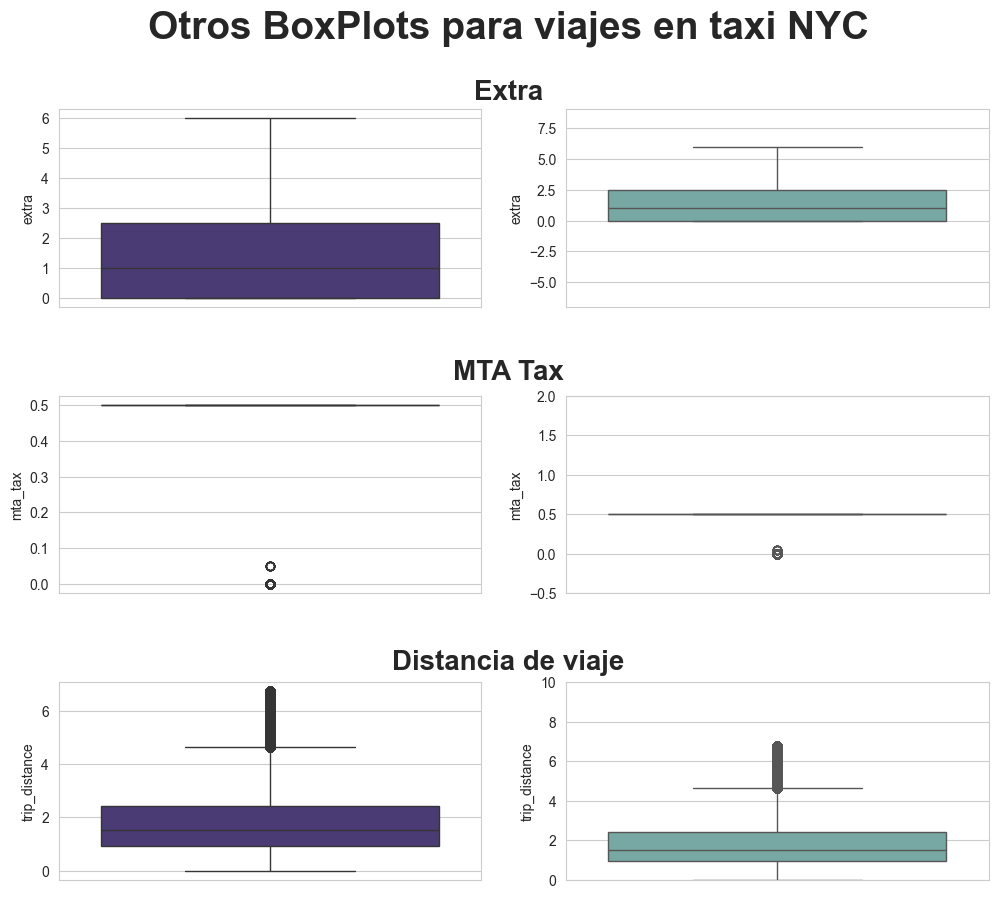

In [64]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Otros BoxPlots para viajes en taxi NYC', fontsize=28, fontweight='bold')
plt.subplots_adjust(top = 0.88, hspace=0.45)

fig.text(0.5, 0.89, 'Extra', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.61, 'MTA Tax', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.32, 'Distancia de viaje', ha='center', fontsize=20, fontweight='bold')

sns.boxplot(data=var_cuanti, y='extra', ax = ax[0,0])
sns.boxplot(data=var_cuanti, y='extra', saturation=0.3, color='turquoise', ax = ax[0,1])
ax[0,1].set_ylim(-7, 9)

sns.boxplot(data=var_cuanti, y='mta_tax', ax = ax[1,0])
sns.boxplot(data=var_cuanti, y='mta_tax', saturation=0.3, color='turquoise', ax = ax[1,1])
ax[1,1].set_ylim(-0.5, 2)

sns.boxplot(data=var_cuanti, y='trip_distance', ax = ax[2,0])
sns.boxplot(data=var_cuanti, y='trip_distance', saturation=0.3, color='turquoise', ax = ax[2,1])
ax[2,1].set_ylim(0,10)

plt.show()

In [65]:
def outliers_neg (col):
    '''
    Funcion que imprime la cantidad de outliers y su porcentaje en formato de tabla
        Parametros:
            col (str): Nombre de la columna
    '''
    out = var_cuanti[var_cuanti[col]<0]
    print(f'| {col} | ', out.shape[0], ' | ', (out.shape[0]/taxis.shape[0])*100, '% |')

for i in var_cuanti.columns:
    outliers_neg(i)

| fare_amount |  0  |  0.0 % |
| extra |  0  |  0.0 % |
| mta_tax |  0  |  0.0 % |
| tip_amount |  0  |  0.0 % |
| tolls_amount |  0  |  0.0 % |
| improvement_surcharge |  0  |  0.0 % |
| total_amount |  0  |  0.0 % |
| congestion_surcharge |  0  |  0.0 % |
| Airport_fee |  0  |  0.0 % |
| passenger_count |  0  |  0.0 % |
| trip_distance |  0  |  0.0 % |
